In [3]:
(* Constantes *)
ns = 0.9;
(* dc = 3 Gamma[3 / 4]^2 / (Sqrt[2 \[Pi]^3]); *)
dc = 0.572069;
rSbyrc = ns/dc;
(* rSbyrc = 2.; Dibuja las coordenadas tortuga de Schwarzschild *)
yR = 60.;
yL = -yR;
li = 0;
lf = 3;
rS = 2.;
li = 0;
lf = 0;
wi = 2 10^-2;
wf = 1.;
nw = 100;
hw = (wf - wi) / nw;

(* Funciones *)
z[x_] = Sqrt[(x^2 + Sqrt[x^2 + 4]) / 2];
zp[x_] = 1 + 1 / z^4 /. z -> z[x];
zm[x_] = 1 - 1 / z^4 /. z -> z[x];
h[x_] = -1 / dc + Sqrt[z^4 - 1] (Hypergeometric2F1[1 / 2, 3 / 4, 3 / 2, 1 - z^4] + Hypergeometric2F1[1 / 2, 7 / 4, 3 / 2, 1 - z^4]) / 2 /. z -> z[x];
a[x_] = (1 - rSbyrc (1 + dc h[x]) / (z Sqrt[zm[x]])) / zp[z] /. z -> z[x];
zyy = a[x] zp[x] D[a[x] zp[x] D[z[x], x], x];
tortoiseXY = NDSolveValue[{x'[y] == a[x[y]] zp[x[y]], x[yL] == yL + 14.}, x, {y, yL, yR}];

-Graphics-
tortoiseXY.jpg
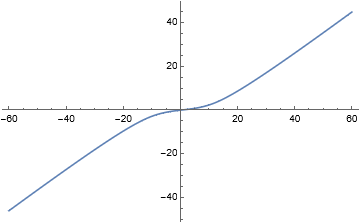

In [28]:
Plot[tortoiseXY[y], {y, yL, yR}, PlotRange -> All]
Export["tortoiseXY.jpg", Plot[tortoiseXY[y], {y, yL, yR}, PlotRange -> All]]

-Graphics-
veff.jpg
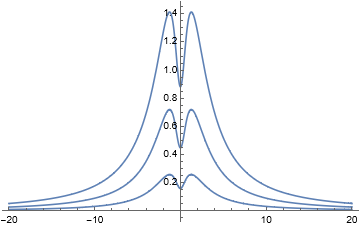

In [30]:
veff[y_, l_] := (l (1. + l) a[x]) / z[x]^2 + zyy / z[x] /. x -> tortoiseXY[y];
Plot[Table[veff[x, l], {l, 1, 3}], {x, -20, 20}, PlotRange -> All]
Export["veff.jpg", Plot[Table[veff[x, l], {l, 1, 3}], {x, -20, 20}, PlotRange -> All]]

In [29]:
(* Vamos a solucionar la ecuación de onda para cada uno de los momentos angulares *)
datosR = Table[{}, {l, 1, lf + 1}];
datosT = Table[{}, {l, 1, lf + 1}];
figR2 = Table[{}, {l, 1, lf + 1}];
figT2 = Table[{}, {l, 1, lf + 1}];
sigmaL = Table[{}, {l, 1, lf + 1}];

Table[
    (*veff[y_] := ((l (1. + l)) / x^2 + rS / x^3) (1. - rS / x) /. x -> tortoiseXY[y];*)
    veff[y_, l_] := (l (1. + l) a[x]) / z[x]^2 + zyy / z[x] /. x -> tortoiseXY[y];
    Table[
        solRT = NDSolveValue[{phi''[y] + (w^2 - veff[y, l]) phi[y] == 0, phi[yR] == Exp[I w yR], phi'[yR] == I w Exp[I w yR]}, phi, {y, yL, yR}];
        (* Ahora calculamos los coeficientes RT *)
        index0 = 6;
        index1 = 10;
        k1 = -(yL + index0 h);
        k2 = -(yL + index1 h);
        result = {ka, kb} /. Solve[{solRT[-k1] == ka Exp[I k1 w] + kb Exp[-I k1 w], solRT[-k2] == ka Exp[I k2 w] + kb Exp[-I k2 w]}, {ka, kb}];
        a = result[[1]][[1]];
        b = result[[1]][[2]];
        (* Una vez resuelto el sistema usamos A y B para obtener R y T *)
        abs2A = Abs[a]^2;
        abs2B = Abs[b]^2;
        t = 1. / abs2A;
        r = abs2B / abs2A;
        figT2[[l + 1]] = Append[figT2[[l + 1]], {w, t}];
        figR2[[l + 1]] = Append[figR2[[l + 1]], {w, r}];
        sigmaL[[l + 1]] = Append[sigmaL[[l + 1]], {w, (Pi (2 l + 1) (1 - r)) / w^2}];
        (*
        phiL = solRT[1];
        phipL = solRT'[1];
        t = (-2 I w Exp[-I w yL]) / (phipL - I w phiL);
        r = t Exp[-I w yL] (phipL + I w phiL) / (2 I w);
        t2 = Abs[t]^2;
        r2 = Abs[r]^2;
        datosT[[l + 1]] = Append[datosT[[l + 1]], {w, t}];
        datosR[[l + 1]] = Append[datosR[[l + 1]], {w, r}];
        figT2[[l + 1]] = Append[figT2[[l + 1]], {w, t2}];
        figR2[[l + 1]] = Append[figR2[[l + 1]], {w, r2}];
        sigmaL[[l + 1]] = Append[sigmaL[[l + 1]], {w, (Pi (2 l + 1) (1 - r2)) / w^2}];
        *)
    , {w, wi, wf, hw}
    ]
, {l, li, lf}
];

-Graphics-
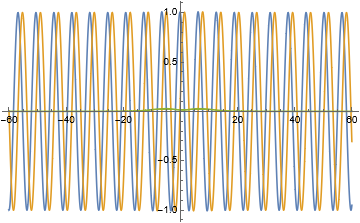

In [36]:
(* Gráfica para una sola frecuencia *)
Plot[{Re[solRT[y]], Im[solRT[y]], veff[y, 0]}, {y, yL, yR}, PlotRange -> All]

-Graphics-
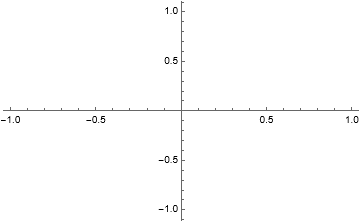

In [38]:
ListPlot[{figR2[[1]], figT2[[1]]}]

In [39]:
(* Exportación de datos *)
n = 1001;
step = (yR - yL) / (n - 1);

h60 = Table[{y, h[y]}, {y, yL, yR, step}];
Export["h60.csv", h60];
t60 = Table[{y, tortoiseXY[y]}, {y, yL, yR, step}];
Export["t60.csv", t60];
(*wave60l0 = Table[{Re[solRT[y]], Im[solRT[y]], veff[y, 0]}, {y, yL, yR, step}];*)
wave60l0PhiRea = Table[{y, Re[solRT[y]]}, {y, yL, yR, step}];
Export["wave60l0PhiRea.csv", wave60l0PhiRea];
wave60l0PhiIma = Table[{y, Im[solRT[y]]}, {y, yL, yR, step}];
Export["wave60l0PhiIma.csv", wave60l0PhiIma];
wave60l0Veff = Table[{y, veff[y, 0]}, {y, yL, yR, step}];
Export["wave60l0Veff.csv", wave60l0Veff];